In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

import pySPEC as ps
from pySPEC.time_marching import SWHD_1D

param_path = 'examples/time_marching_swhd1D_DoubleGauss'
# Parse JSON into an object with attributes corresponding to dict keys.
pm = json.load(open(f'{param_path}/params.json', 'r'), object_hook=lambda d: SimpleNamespace(**d))
pm.Lx = 2*np.pi*pm.Lx

# Initialize solver
grid   = ps.Grid1D(pm)

In [38]:
A = 0.001
noise = 0
for k in [20, 50 , 70, 100 , 200, 500]:
    mode = A*np.sin(grid.xx*k)
    noise = noise + mode

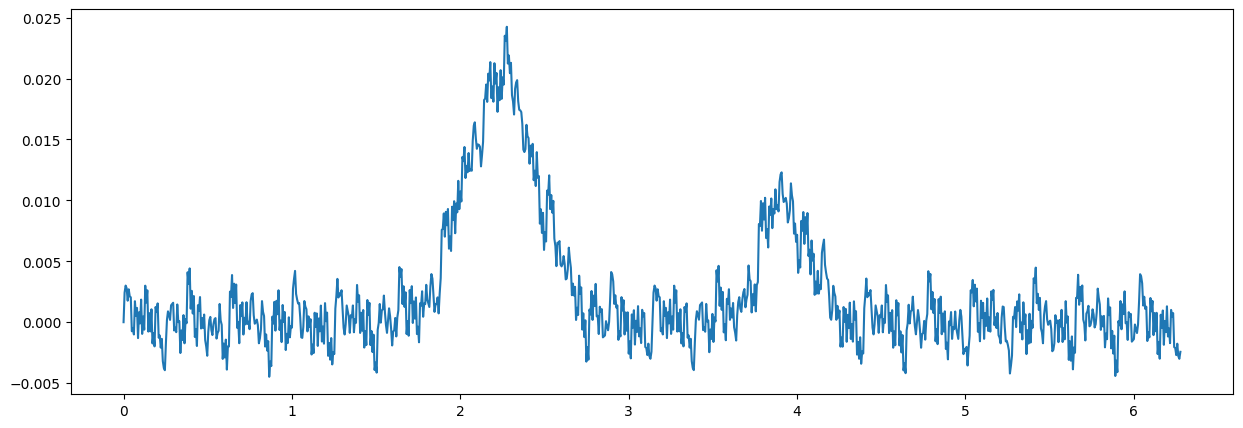

In [39]:
s0 =  0.02
s1 =  0.3
s2 = 1.4
s3 = 0.01
s4 = 0.2
s5 = 0.8
hb = s0*np.exp(-(grid.xx-np.pi/s2)**2/s1**2) + s3*np.exp(-(grid.xx-np.pi/s5)**2/s4**2) + noise

plt.figure( figsize = (15,5))
plt.plot(grid.xx , hb)


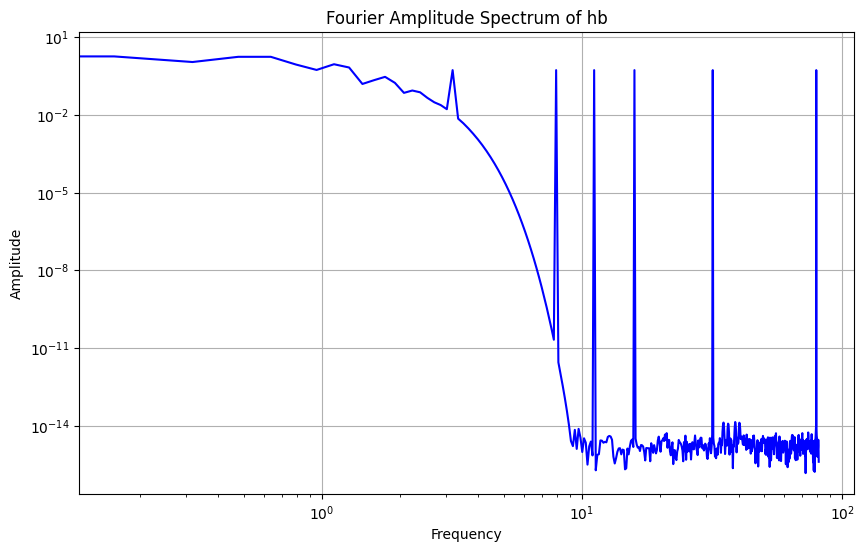

In [40]:

# Compute Fourier Transform of hb
hb_fft = np.fft.fft(hb)
hb_freq = np.fft.fftfreq(Nx, d=dx)

# Take only the positive frequencies for plotting
hb_amplitude = np.abs(hb_fft[:Nx // 2])
hb_freq_positive = hb_freq[:Nx // 2]

# Plot the Fourier Amplitude Spectrum
plt.figure(figsize=(10, 6))
plt.loglog(hb_freq_positive, hb_amplitude, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Amplitude Spectrum of hb')
plt.grid()
plt.show()